In [4]:
import regex as re
from collections import defaultdict
import time
from scipy.sparse import *

import numpy as np
from sklearn.svm import SVC
from tqdm import tqdm
import os 
import glob
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import *
import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline



import sys
sys.path.insert(1, '../src')
import make_dataset
import model 
import build_features
import multi_kernel

from mklaren.kernel.kernel import linear_kernel
try:
    from mklaren.mkl.alignf import Alignf
except:
    from mklaren.mkl.alignf import Alignf
from mklaren.kernel.kernel import linear_kernel, poly_kernel




plt.style.use('seaborn-whitegrid')

In [5]:
dir_list = '../test-data'

benign_path = make_dataset.benign_app_paths_test(dir_list)[:2]

test_benign_paths = benign_path[2:]
benign_paths = benign_path[:2]

with open('../test-data/processed/app_to_api.json') as f:
    apps_dic = json.loads(f.read())
    f.close()
    
api_path = '../test-data/processed/unique_api.text'
with open(api_path, "rb") as fp: 
    api_list = pickle.load(fp)
app_list = list(apps_dic.keys())

with open('../test-data/processed/test_app_api.json') as f:
    test_apps_dic = json.loads(f.read())
    f.close()
app_list_test = list(test_apps_dic.keys())

## Loading matrix

In [6]:
## Loads A matrix 
a_matrix = load_npz("../test-data/matrix/a_matrix.npz")

## Loads B matrix 
b_matrix = load_npz("../test-data/matrix/b_matrix.npz")

## Loads P matrix 
p_matrix = load_npz("../test-data/matrix/p_matrix.npz")


a_test_matrix = load_npz("../test-data/matrix/a_test_matrix.npz")

## Creating Kernels 

### AA^T

In [7]:
train_kernel_aa  = model.aa_kernel(a_matrix,a_matrix)
df_train_aa  = model.create_df(train_kernel_aa,benign_paths,app_list )

test_kernel_aa =  model.aa_kernel(a_test_matrix,a_matrix)
df_test_aa  = model.create_df(test_kernel_aa,test_benign_paths,app_list_test )




In [8]:
#model.kernel_viz_func(df_train_aa, 'aa')

In [9]:
clf = LinearSVC(max_iter = 10000)
dic_scores,test_df = model.run_model(df_train_aa,df_test_aa, clf)
dic_scores



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'accuracy': 0.3333333333333333,
 'f1_score': 0.0,
 'tn': 1,
 'fp': 2,
 'fn': 0,
 'tp': 0}

### ABA^T

PCA Plot:


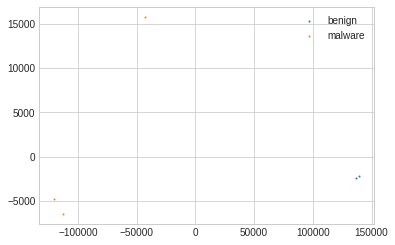

T-SNE Plot:


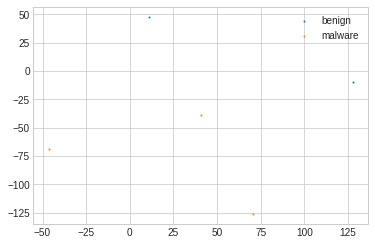

Both Plot:


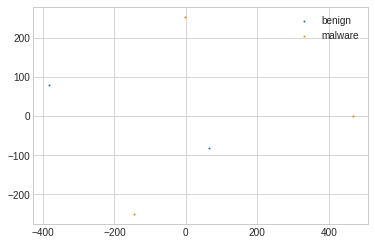

In [10]:
train_kernel_ab  = model.ab_or_p_kernel(a_matrix,a_matrix,b_matrix)
df_train_ab  = model.create_df(train_kernel_ab,benign_paths,app_list )

test_kernel_ab =  model.ab_or_p_kernel(a_test_matrix,a_matrix,b_matrix)
df_test_ab  = model.create_df(test_kernel_ab,test_benign_paths,app_list_test )


model.kernel_viz_func(df_train_ab, 'ab')

In [11]:
clf = LinearSVC(max_iter = 10000)
dic_scores,test_df = model.run_model(df_train_ab,df_test_ab, clf)
dic_scores

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'accuracy': 0.6666666666666666,
 'f1_score': 0.0,
 'tn': 2,
 'fp': 1,
 'fn': 0,
 'tp': 0}

### APA^T

PCA Plot:


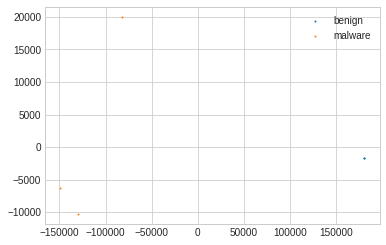

T-SNE Plot:


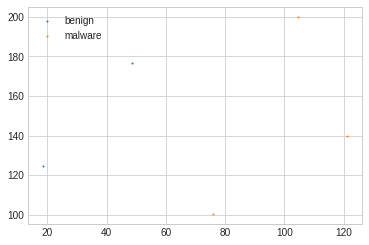

Both Plot:


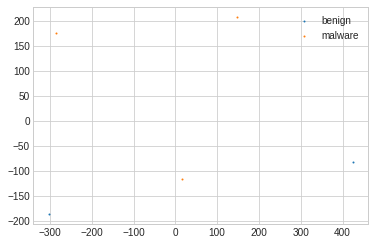

In [12]:
train_kernel_ap  = model.ab_or_p_kernel(a_matrix,a_matrix,p_matrix)
df_train_ap  = model.create_df(train_kernel_ap,benign_paths,app_list )

test_kernel_ap =  model.ab_or_p_kernel(a_test_matrix,a_matrix,p_matrix)
df_test_ap  = model.create_df(test_kernel_ap,test_benign_paths,app_list_test )


model.kernel_viz_func(df_train_ap, 'ap')

In [13]:
clf = LinearSVC(max_iter = 10000)
dic_scores,test_df = model.run_model(df_train_ap,df_test_ap, clf)
dic_scores

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'accuracy': 0.3333333333333333,
 'f1_score': 0.0,
 'tn': 1,
 'fp': 2,
 'fn': 0,
 'tp': 0}

### APBPA^T

PCA Plot:


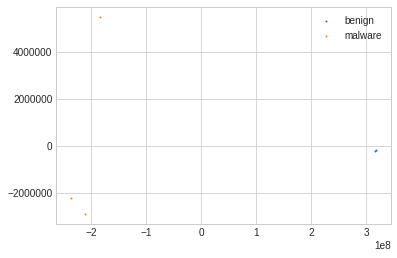

T-SNE Plot:


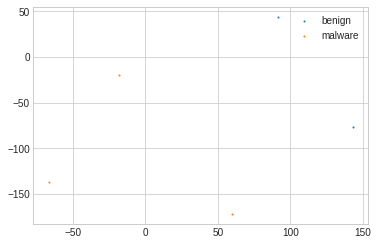

Both Plot:


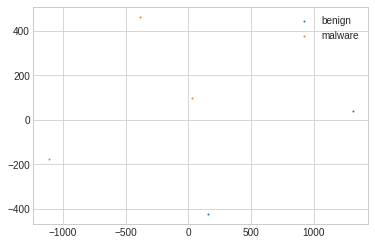

In [14]:
train_kernel_apb  = model.apbpa_kernel(a_matrix,a_matrix,b_matrix,p_matrix)
df_train_apb  = model.create_df(train_kernel_apb,benign_paths,app_list )

test_kernel_apb =  model.apbpa_kernel(a_test_matrix,a_matrix,b_matrix, p_matrix)
df_test_apb  = model.create_df(test_kernel_apb,test_benign_paths,app_list_test )

model.kernel_viz_func(df_train_apb, 'abp')



In [15]:
clf = LinearSVC(max_iter = 10000)
dic_scores,test_df = model.run_model(df_train_apb,df_test_apb, clf)
dic_scores

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'accuracy': 0.3333333333333333,
 'f1_score': 0.0,
 'tn': 1,
 'fp': 2,
 'fn': 0,
 'tp': 0}

## Multi-kernel

In [16]:
train_kernel_list = [train_kernel_aa,train_kernel_ab\
                           ,train_kernel_ap,train_kernel_apb]
test_kernel_list = [test_kernel_aa,test_kernel_ab\
                           ,test_kernel_ap,test_kernel_apb]

In [17]:
model_align = Alignf(typ="convex")
labels = df_train_apb['type'].values

df_train_multi, df_test_multi = multi_kernel.get_scores_multi(train_kernel_list,test_kernel_list, \
                             poly_kernel,model_align,labels, benign_paths\
                             ,app_list, app_list_test)

In [18]:
clf = LinearSVC(max_iter = 10000)
dic_scores,test_df = model.run_model(df_train_multi,df_test_multi, clf)
dic_scores

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'accuracy': 0.3333333333333333,
 'f1_score': 0.0,
 'tn': 1,
 'fp': 2,
 'fn': 0,
 'tp': 0}